## Imports

In [56]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# importing the Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

## Splitting the training, validation and test sets

In [35]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [36]:
X_train.shape

(55000, 28, 28)

In [37]:
X_train.dtype

dtype('uint8')

In [38]:
X_train, X_valid, X_test = X_train / 255., X_valid / 225., X_test / 225.

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [40]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

## Training the model

In [41]:
tf.random.set_seed(42) # setting the random seed to 42

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [44]:
weights, biases = model.layers[1].get_weights()
weights

array([[-0.0668574 ,  0.06523056, -0.02818944, ...,  0.02776779,
        -0.0436815 , -0.05837549],
       [ 0.04193676, -0.0082696 , -0.04023779, ..., -0.05505571,
         0.06365326, -0.05040043],
       [ 0.03041261, -0.02579478,  0.03647117, ...,  0.05761819,
        -0.02892634,  0.01666158],
       ...,
       [ 0.02237964, -0.0266661 , -0.01348314, ...,  0.04095298,
         0.03249105, -0.02075563],
       [ 0.0595386 , -0.06672031,  0.0231642 , ..., -0.0642492 ,
         0.04878134, -0.0556707 ],
       [ 0.00022051, -0.00299735, -0.04187675, ..., -0.05710901,
         0.03670984, -0.06273247]], dtype=float32)

In [45]:
weights.shape

(784, 300)

In [46]:
biases.shape

(300,)

In [53]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [54]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6875 - loss: 0.9752 - val_accuracy: 0.8334 - val_loss: 0.4833
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8278 - loss: 0.5031 - val_accuracy: 0.8448 - val_loss: 0.4385
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8447 - loss: 0.4517 - val_accuracy: 0.8518 - val_loss: 0.4188
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8528 - loss: 0.4222 - val_accuracy: 0.8560 - val_loss: 0.4041
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8600 - loss: 0.4006 - val_accuracy: 0.8590 - val_loss: 0.3939
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8654 - loss: 0.3833 - val_accuracy: 0.8594 - val_loss: 0.3870
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8711 - loss: 0.3689 - val_accuracy: 0.8608 - val_loss: 0.3812
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8751 - loss: 0.3563 - 

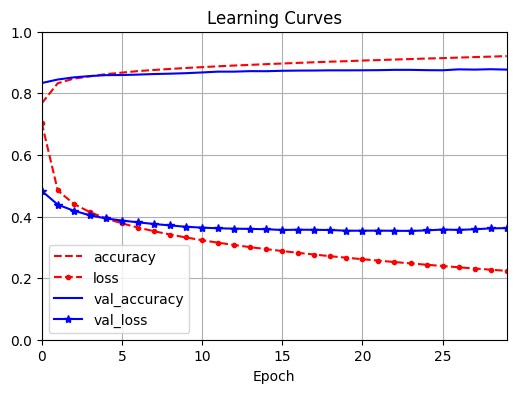

In [80]:
pd.DataFrame(history.history).plot(
    figsize=(6,4), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.legend(loc='lower left')
plt.title("Learning Curves")
plt.show()

In [81]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8751 - loss: 0.3817


[0.3803097605705261, 0.8762000203132629]

In [85]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.166, 0.   , 0.004, 0.   ,
        0.83 ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.312, 0.   , 0.01 , 0.   , 0.001, 0.   , 0.677, 0.   , 0.   ,
        0.   ]], dtype=float32)

In [86]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6])

In [87]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [111]:
y_test_new = y_test[:5]
y_test_new

array([9, 2, 1, 1, 6], dtype=uint8)

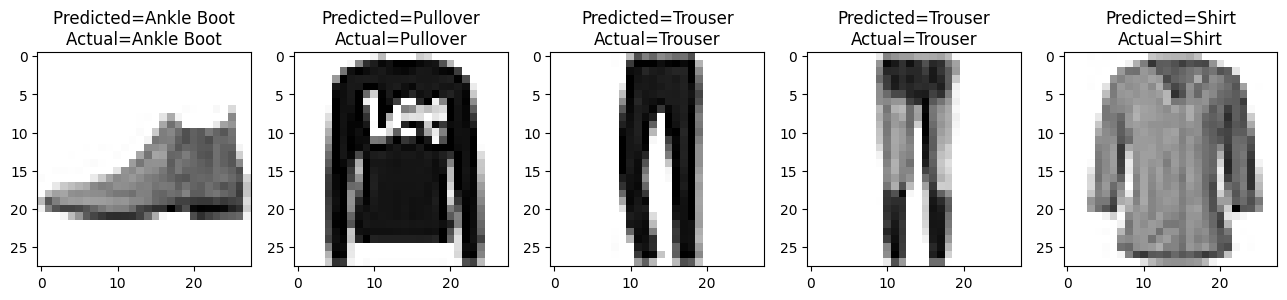

In [123]:
figure, ax = plt.subplots(1,5, figsize=(16,16))
for i in range(5):
    col = i % 5
    ax[col].imshow(X_new[i], cmap="gray_r")
    ax[col].set_title(f"Predicted={class_names[y_pred[i]]}\nActual={class_names[y_test_new[i]]}")

plt.show()